## Safety and Efficacy of the BNT162b2 mRNA Covid-19 Vaccine

<https://www.nejm.org/doi/full/10.1056/NEJMoa2034577>

<img src="https://www.nejm.org/na101/home/literatum/publisher/mms/journals/content/nejm/2020/nejm_2020.383.issue-27/nejmoa2034577/20210201/images/img_xlarge/nejmoa2034577_f4.jpeg">

<img src="../imgs/rct-table2.png">

<table style="width:90%">
    <tr style="background-color:white;">
        <td><strong>Efficacy End Point</strong>
            <table >
                <tr style="background-color:white;">
                    <td> </td>
                </tr>
            </table>
        </td>
        <td style="text-align: center; vertical-align: middle;"><strong>BNT162b2</strong>
            <table>
                <tr style="background-color:white;">
                    <td>No. of Cases</td>
                    <td>Surveillance Time (n)</td>
                </tr>
            </table>
        </td>
        <td style="text-align: center; vertical-align: middle;"><strong>Placebo</strong>
            <table>
                <tr style="background-color:white;">
                    <td>No. of Cases</td>
                    <td>Surveillance Time (n)</td>
                </tr>
            </table>
        </td>
        <td><strong>Vaccine Efficacy, %(95% Credible Interval)</strong>
            <table>
                <tr style="background-color:white;">
                    <td> </td>
                </tr>
            </table>
        </td>
        <td><strong>Posterior Probability (Vaccine Efficacy >30%)</strong>
            <table>
                <tr style="background-color:white;">
                    <td> </td>
                </tr>
            </table>
        </td>
    </tr>
    <tr style="background-color:#FEF5E7;">
        <td>Covid-19 occurrence at least 7 days after the second dose in participants without evidence of infection
        </td>
        <td style="text-align: center; vertical-align: middle;">
            <strong>(N=18,198)</strong>
            <table >
                <tr style="background-color:#FEF5E7;">
                    <td>8</td>
                    <td>2.214 (17,411)</td>
                </tr>
            </table>
        </td>
        <td style="text-align: center; vertical-align: middle;">
            <strong>(N=18,325)</strong>
            <table >
                <tr style="background-color:#FEF5E7;">
                    <td>162</td>
                    <td>2.222 (17,511)</td>
                </tr>
            </table>
        </td>
        <td>95.0 (90.3-97.6)
        </td>
        <td>>0.9999
        </td>
    </tr>
    <tr style="background-color:white;">
        <td>Covid-19 occurrence at least 7 days after the second dose in participants with and those without evidence of infection
        </td>
        <td style="text-align: center; vertical-align: middle;">
            <strong>(N=19,965)</strong>
            <table >
                <tr style="background-color:white;">
                    <td>9</td>
                    <td>2.332 (18,559)</td>
                </tr>
            </table>
        </td>
        <td style="text-align: center; vertical-align: middle;">
            <strong>(N=20,172)</strong>
            <table >
                <tr style="background-color:white;">
                    <td>169</td>
                    <td>2.345 (18,708)</td>
                </tr>
            </table>
        </td>
        <td>94.6 (89.9-97.3)
        </td>
        <td>>0.9999
        </td>
    </tr>
</table>

__Vaccine efficacy__ was estimated by $100\times(1−\textrm{IRR})$, 

$$\textrm{Vaccine Efficacy} = 100 \cdot (1 - \textrm{IRR})$$

where IRR is the calculated ratio of confirmed cases of Covid-19 illness per 1000 person-years of follow-up in the active vaccine group to the corresponding illness rate in the placebo group.

$$\textrm{IRR} = \frac{\textrm{Vaccine Incidence Rate}}{\textrm{Placebo Incidence Rate}}$$

In [105]:
from scipy import stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
plt.rcParams["figure.figsize"] = (8,6)

In [26]:
cases_vaccine, size_vaccine, cases_placebo, size_placebo = 8, 17411, 162, 17511
cases_vaccine/size_vaccine, cases_placebo/size_placebo

(0.00045947963930848316, 0.009251327736851122)

$$\textrm{Vaccine Incidence Rate} = \frac{8}{17411} = 0.000459$$

$$\textrm{Placebo Incidence Rate} = \frac{162}{17511} = 0.00925$$

In [27]:
100 * (1-(cases_vaccine/size_vaccine)/(cases_placebo/size_placebo))

95.03336545436368

$$\pi_v = \textrm{Vaccine Incidence Rate}$$

$$\pi_c = \textrm{Placebo Incidence Rate}$$

$$\textrm{Vaccine Efficacy} = 100 \cdot \Bigg(1 - \frac{\frac{8}{17411}}{\frac{162}{17511}}\Bigg) = 95.0$$

$$(\textrm{Posterior beliefs}) \propto (\textrm{Prior beliefs}) \cdot (\textrm{Likelihood of observed data})$$

$$\textrm{Likelihood of observed data} = \binom{n}{k} \theta^{k}(1-\theta)^{n-k} $$

$$\textrm{Prior beliefs} = \textrm{constant} \cdot \theta^{\alpha - 1}(1-\theta)^{\beta - 1},$$

$$\textrm{Posterior beliefs} \propto \theta^{k}(1-\theta)^{n-k}\cdot \theta^{\alpha - 1}(1-\theta)^{\beta - 1} $$
$$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\propto \theta^{\alpha + k - 1}(1-\theta)^{\beta + n - k - 1} $$

$$k \sim \mathrm{Binomial}(n, \theta) \\
\theta \sim \mathrm{Beta}(\alpha,\beta) $$

$$\frac{\alpha}{\alpha + \beta} = 0.01.$$

$$0.01 = \frac{\alpha}{\alpha + 1} = \frac{\alpha + 1 - 1}{\alpha + 1} = 1 - \frac{1}{\alpha + 1}, $$

$$\alpha + 1 = \frac{1}{1-0.01}$$

In [110]:
p = 0.01
1/(1-p) -1

0.010101010101010166

In [111]:
p = 0.007
1/(1-p) -1

0.007049345417925457

$$\pi_v = \textrm{Vaccine Incidence Rate}  \sim \mathrm{Beta}(0.010101 + 8, 1 + 17411 - 8) $$

$$\pi_c = \textrm{Placebo Incidence Rate} \sim \mathrm{Beta}(0.010101 + 168, 1 + 17511 - 162) $$

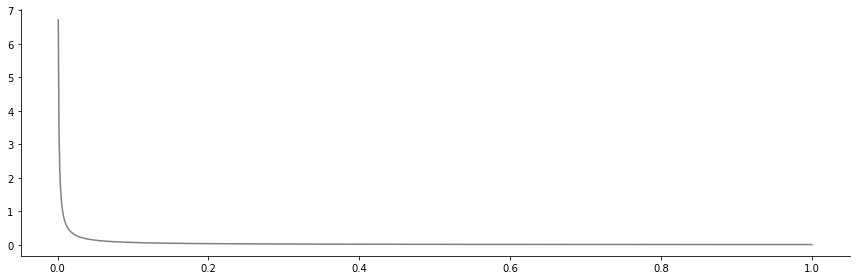

In [121]:
samples = stats.beta.rvs(0.007049, 1, size=1000000)
samples_df = pd.DataFrame(
    {
        'Priors: vaccine and placebo': samples
    }
).melt(value_vars=['Priors: vaccine and placebo'], var_name='group', value_name='rate')

x = np.linspace(0, 1, 1001)
y = stats.beta.pdf(x, 0.007049, 1)
ax = sns.relplot(x=x, y=y, kind="line", color='gray', height=4, aspect=3)

In [112]:
samples_vaccine = stats.beta.rvs(0.007049 + 8, 1 + 17411 - 8, size=100000)
samples_placebo = stats.beta.rvs(0.010101 + 162, 1 + 17511 - 162, size=100000)
samples_vc_pd = pd.DataFrame(
    {
        'vaccine': samples_vaccine,
        'placebo': samples_placebo
    }
).melt(value_vars=['vaccine', 'placebo'], var_name='group', value_name='rate')

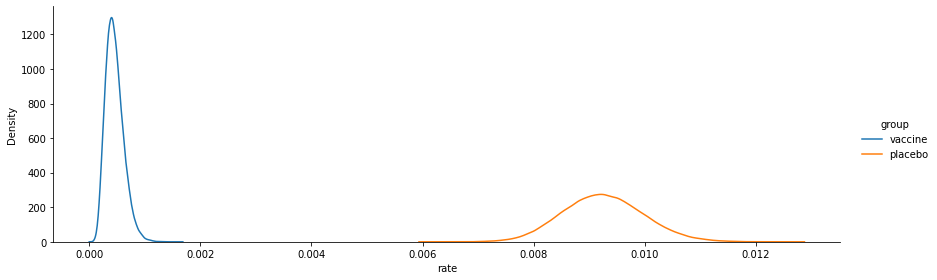

In [113]:
sns.displot(samples_vc_pd , x="rate", kind="kde", hue='group', height=4, aspect=3)

$$P(\pi_v < \pi_c)$$

In [ ]:
from scipy import stats

N = 1000000
samples_vaccine = stats.beta.rvs(0.007049 + 8, 1 + 17411 - 8, size=N)
samples_placebo = stats.beta.rvs(0.010101 + 162, 1 + 17511 - 162, size=N)

sum(samples_vaccine < samples_placebo) / N

$$P(\pi_v < \pi_c) > 99.99$$

$$\textrm{Vaccine Efficacy} = 100 \cdot (1 - \textrm{IRR}) = 100 \cdot \Big(1 - \frac{\pi_v}{\pi_c}\Big)$$

In [ ]:
samples_ve = 100 * (1 - samples_vaccine/samples_placebo)

sum(samples_ve > 30) / N

$$P(\textrm{Vaccine Efficacy} > 30\%) > 99.99$$

In [ ]:
import numpy as np

np.percentile(samples_ve, 2.5), np.percentile(samples_ve, 97.5)

## Niusance parameter

$$\theta = \frac{1 -\textrm{Vaccine Efficacy}/100}{2 - \textrm{Vaccine Efficacy}/100}.$$

$$\theta = \frac{\frac{\pi_v}{\pi_c}}{1-\frac{\pi_v}{\pi_c}} = \frac{\pi_v}{\pi_v +\pi_c}. $$

$$\theta = 
    \frac{\frac{k_v}{n/2}}{\frac{k_v}{n/2}+\frac{k_c}{n/2}}  = 
    \frac{k_v}{k_v+k_c}.$$

$$\theta = \frac
    {\textrm{COVID-19 cases in vaccine group}}
    {\textrm{COVID-19 cases in vaccine group} + \textrm{COVID-19 cases in placebo group}}.$$

In [ ]:
(1-0.3)/(2-.3)

$$\theta = \frac{1 -\textrm{Vaccine Efficacy}}{2 - \textrm{Vaccine Efficacy}} = \frac{1-0.3}{2-0.3} = 0.4118.$$

$$\frac{\alpha}{\alpha + \beta} = 0.4118.$$

$$\alpha = \frac{1}{1-0.4118} - 1 = 0.700102.$$

In [169]:
thetas = stats.beta.rvs(0.700102, 1, size=10000000)
ves = 1 - thetas/(1-thetas)

In [170]:
np.mean(ves), np.percentile(ves, 2.5), np.percentile(ves, 97.5)

(-17.188611195016605, -26.138673413264257, 0.9948327091467072)

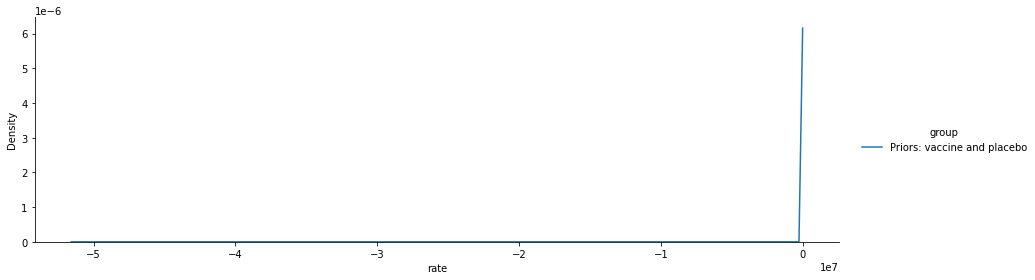

In [172]:
samples_df = pd.DataFrame(
    {
        'Priors: vaccine and placebo': ves
    }
).melt(value_vars=['Priors: vaccine and placebo'], var_name='group', value_name='rate')

sns.displot(samples_df, x="rate", kind="kde", hue='group', height=4, aspect=3)

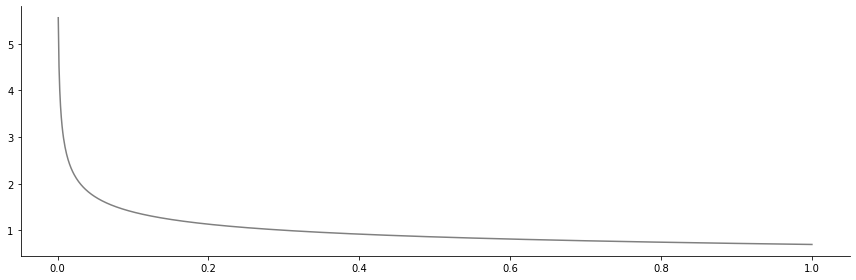

In [163]:
x = np.linspace(0.000, 1, 1001)
y = stats.beta.pdf(x, 0.700102, 1)
ax = sns.relplot(x=x, y=y, kind="line", color='gray', height=4, aspect=3)

#### Posterior distribution

In [164]:
p = 0.4118
1/(1-p) -1

0.7001020061203671

In [ ]:
8 * (17411 + 17511)/17411 *1 /2

In [ ]:
162 * (17411 + 17511)/17511 *1 /2

$$\textrm{adjusted number of occurrences in vaccine group} = 8 \cdot \frac{17411 + 17511}{17411} \cdot \frac{1}{2} = 8.02297$$

$$\textrm{adjusted number of occurrences in placego group} = 162 \cdot \frac{17411 + 17511}{17511} \cdot \frac{1}{2} = 161.5374$$

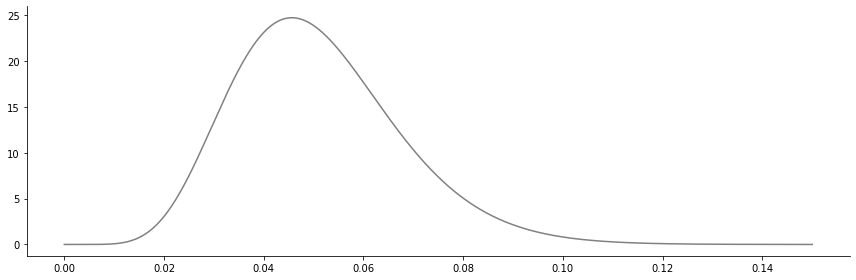

In [167]:
x = np.linspace(0.000, .15, 1001)
y = stats.beta.pdf(x, 0.700102+8.02297, 1+161.53743)
ax = sns.relplot(x=x, y=y, kind="line", color='gray', height=4, aspect=3)

In [168]:
thetas = stats.beta.rvs(0.700102, 1, size=1000000) 
ves = 1 - thetas/(1-thetas)

In [24]:
1- 8.02297/161.5374

0.9503336688593478

In [22]:
theta025 = stats.beta.ppf(0.025, 0.700102 + 8.02297, 1 + 161.53743)
theta975 = stats.beta.ppf(.975, 0.700102 + 8.022974, 1 + 161.53743)
theta025, theta975

(0.023345990993792774, 0.08838690875349431)

In [177]:
theta025 = stats.beta.ppf(0.025, 0.700102 + 8.02297, 1 + 161.53743)
theta975 = stats.beta.ppf(.975, 0.700102 + 8.022974, 1 + 161.53743)
ves975 = 100 * (1 - theta025/(1-theta025))
ves025 = 100 * (1 - theta975/(1-theta975))
ves025, ves975 

#Out: (90.30433968070409, 97.60959451571306)

(90.30433968070409, 97.60959451571306)

In [185]:
theta025 = stats.beta.ppf(0.025, 0.700102 + 8.02297, 1 + 161.53743)
theta975 = stats.beta.ppf(.975, 0.700102 + 8.022974, 1 + 161.53743)
ves975 = 1 - theta025/(1-theta025)
ves025 = 1 - theta975/(1-theta975)
ves025, ves975 

(0.9030433968070408, 0.9760959451571305)

In [186]:
thetas = stats.beta.rvs(0.700102 + 8.02297, 1 + 161.53743, size=1000000)
ves = 1 - thetas/(1-thetas)
np.percentile(ves, 2.5), np.percentile(ves, 97.5)

(0.9031371659977501, 0.976101494783773)

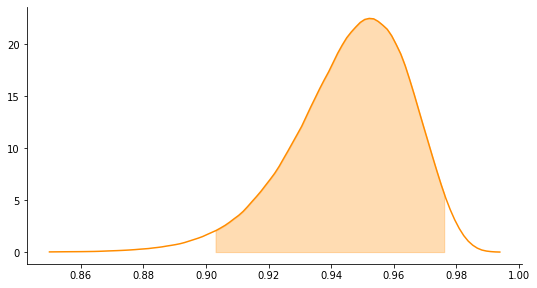

In [190]:
kde = stats.gaussian_kde(ves)
pos_all = np.linspace(0.85, ves.max(), 101)
ax = sns.relplot(x=pos_all, y=kde(pos_all), kind="line", color='darkorange')
ax.fig.set_figwidth(8)
ax.fig.set_figheight(4)
pos = np.linspace(ves025, ves975, 101)
plt.fill_between(pos, kde(pos), alpha=0.3, color='darkorange')
plt.show()

In [ ]:
thetas = stats.beta.rvs(0.700102 + 8, 1 + 162, size=1000000) 
#ves = (1-2*thetas)/(1-thetas)
#np.percentile(ves, 2.5), np.percentile(ves, 97.5)
thetas

In [ ]:
theta_mean = np.mean(thetas)
theta_mean
#theta_mean = (0.700102 + 8)/(1 + 162)

In [ ]:
(1-2*theta_mean)/(1-theta_mean)

In [ ]:
1 - (theta_mean/(1-theta_mean))

In [ ]:
theta_1 = np.percentile(thetas, 2.5)
(1-2*theta_1)/(1-theta_1)

In [ ]:
a1 = 8 
a2 = 4
q1 = 2/3
q2 = 1/3

In [ ]:
(a1/q1)/2, (a2/q2)/2

In [ ]:
8 * (17411 + 17511)/17411 *1 /2

In [ ]:
162 * (17411 + 17511)/17511 *1 /2

In [ ]:
q1 = 17411/(17411 + 17511)
q2 = 17511/(17411 + 17511)

a1 = 8
a2 = 162
b1 = a1/(2*q1)
b2 = a2/(2*q2)
b1, b2

In [13]:
thetas = stats.beta.rvs(0.700102 + 8.02297, 1 + 161.5374 , size=1000000)
ves = (1-2*thetas)/(1-thetas)
#ves = 1 - thetas/(1-thetas)
np.mean(ves), np.percentile(ves, 2.5), np.percentile(ves, 97.5)

(0.9459982638730382, 0.9030435730211366, 0.9761243481131912)

In [14]:
ves = 1 - thetas/(1-thetas)
np.mean(ves), np.percentile(ves, 2.5), np.percentile(ves, 97.5)

(0.9459982638730382, 0.9030435730211365, 0.9761243481131913)

In [ ]:
theta025 = stats.beta.ppf(0.025, 0.700102 + 8.02297, 1 + 161.53743)
ves975 = 1 - theta1/(1-theta1)
theta975 = stats.beta.ppf(.975, 0.700102 + 8.022974, 1 + 161.5374336)
ves025 = 1 - theta2/(1-theta2)
ves025, theta975 

#Out: (0.9030433990045095, 0.08838690692731344)

In [ ]:
theta_mean = np.mean(theta)

In [ ]:
(1-2*theta_mean)/(1-theta_mean)

In [ ]:
samples = 1 - samples_vaccine/samples_placebo
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

$$\theta = \frac{1 -\textrm{Vaccine Efficacy}/100}{2 - \textrm{Vaccine Efficacy}/100}.$$

$$\textrm{Vaccine Efficacy} = 100\cdot \Big(1 - \frac{\theta}{1-\theta}\Big).$$

### Participants with and those without evidence of infection

In [10]:
q1 = 18559/(18559 + 18708)
q2 = 18708/(18559 + 18708)

a1 = 9
a2 = 169
b1 = a1/(2*q1)
b2 = a2/(2*q2)
b1, b2

(9.03612802413923, 168.3269991447509)

$$\textrm{addjusted number of occurrences in vaccine group} = 9 \cdot \frac{18559 + 18708}{18559} \cdot \frac{1}{2} = 9.03613$$

$$\textrm{addjusted number of occurrences in placego group} = 169 \cdot \frac{18559 + 18708}{18708} \cdot \frac{1}{2} = 168.327$$

In [192]:
theta025 = stats.beta.ppf(0.025, 0.700102 + 9.03613, 1 + 168.327)
theta975 = stats.beta.ppf(.975, 0.700102 + 9.03613, 1 + 168.327)
ves975 = 100 * (1 - theta025/(1-theta025))
ves025 = 100 * (1 - theta975/(1-theta975))
ves025, ves975 

#Out: (89.88055638026545, 97.30728685161121)

(89.88055638026545, 97.30728685161121)

In [21]:
theta025 = stats.beta.ppf(0.025, 0.700102 + 9.03613, 1 + 168.327)
theta975 = stats.beta.ppf(.975, 0.700102 + 9.03613, 1 + 168.327)
ves975 = 1 - theta025/(1-theta025)
ves025 = 1 - theta975/(1-theta975)
ves025, ves975 

(0.8988055638026544, 0.9730728685161121)

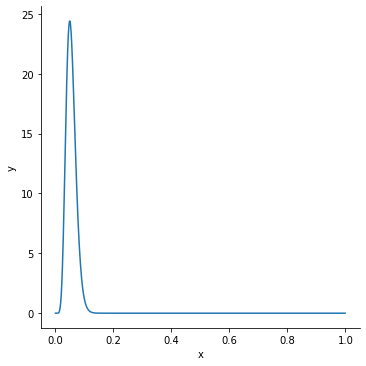

In [79]:
x = np.arange(0, 1, .001)
theta = stats.beta.pdf(x, 0.700102 + 9.03613, 1 + 168.327)
y = (1 - theta)/(2-theta)
ve_plot_df = pd.DataFrame({'x': x, 'y': theta})
sns.relplot(x="x", y="y", kind="line", data=ve_plot_df)

In [180]:
thetas = stats.beta.rvs(0.700102 + 9.03613, 1 + 168.327 , size=1000000)
ves = 1 - thetas/(1-thetas)
np.percentile(ves, 2.5), np.percentile(ves, 97.5)

(0.8988207489196189, 0.9730687437357025)

In [181]:
ves = 1 - thetas/(1-thetas)
np.percentile(ves, 2.5), np.percentile(ves, 97.5)

(0.8988207489196189, 0.9730687437357025)

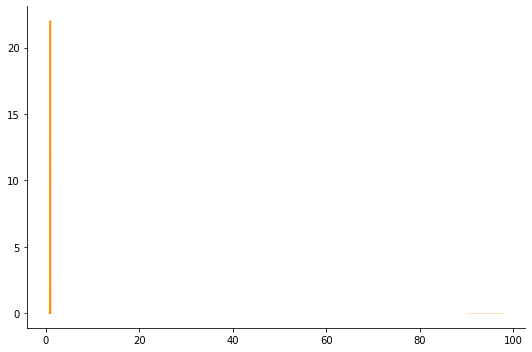

In [182]:
kde = stats.gaussian_kde(ves)
pos_all = np.linspace(ves.min(), ves.max(), 101)
ax = sns.relplot(x=pos_all, y=kde(pos_all), kind="line", color='darkorange')
ax.fig.set_figwidth(8)
ax.fig.set_figheight(5)
pos = np.linspace(ves025, ves975, 101)
plt.fill_between(pos, kde(pos), alpha=0.3, color='darkorange')
plt.show()

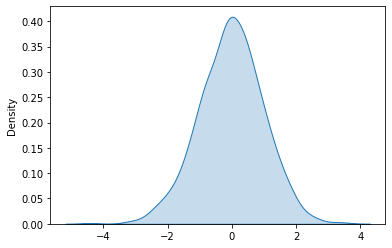

In [67]:
dist = np.random.normal(loc=0, scale=1, size=1000)
ax = sns.kdeplot(dist, shade=True)
line = ax.get_lines()

In [68]:
line

<a list of 0 Line2D objects>

In [66]:
ves

array([0.96669826, 0.96560292, 0.9436391 , ..., 0.9457778 , 0.92958985,
       0.93328491])

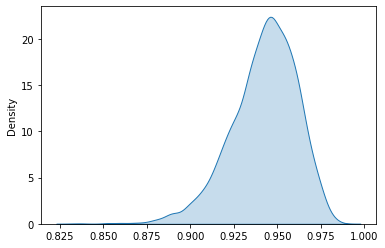

In [64]:
ax = sns.kdeplot(ves, shade=True)
line = ax.get_lines()

In [65]:
line

<a list of 0 Line2D objects>

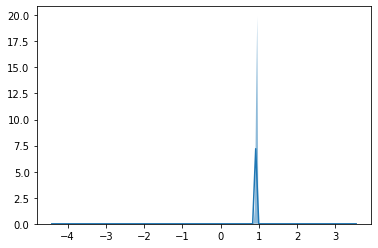

In [99]:
pos = np.linspace(dist.min(), dist.max(), 101)
plt.plot(pos, kde(pos))
# plot shaded kde only right of x=0.5
shade = np.linspace(0.5,dist.max(), 101)
plt.fill_between(shade,kde(shade), alpha=0.5)

plt.ylim(0,None)
plt.show()

In [ ]:
ax = sns.kdeplot(dist, shade=True)
line = ax.get_lines()[-1]
x, y = line.get_data()
mask = x > 0
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='red')
plt.show()

## Participants without evidence of infection

In [ ]:
sr1 = 2.214
sr2 = 2.222

18198 *2 * sr1/(sr1 + sr2)

In [ ]:
samples = stats.beta.rvs(0.5, 0.5, size=10000000)
np.mean(samples), np.percentile(samples, 2.5), np.percentile(samples, 97.5)

In [ ]:
162/17511

In [ ]:
x = 0.5* (1 - 0.3)
x

a/(1+a) = x

(1 + a -1)/(1+a) = x

1 - 1/(1+a) = x

1/(1+a) = 1 - x

1+a = 1/(1-x)

a = 1/(1-x) - 1= (1 - 1 + x)/(1-x) = x/(1-x)

In [ ]:
a = 1/(1 - .01) - 1
a

In [ ]:
p = a/(a+1)
p

In [ ]:
1 - (p/0.5)

In [ ]:
samples_vaccine = stats.beta.rvs(0.5 + 8, 1 + 17411 - 8, size=100000)
samples_placebo = stats.beta.rvs(1 + 162, 1 + 17511 - 162, size=100000)

samples = 1 - samples_vaccine/samples_placebo
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

In [ ]:
hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(samples, alpha=0.05, roundto=4)
hpd_mu

In [ ]:
samples_vaccine = stats.beta.rvs(0.700102 + 9, 1 + 18559 - 9, size=100000)
samples_placebo = stats.beta.rvs(0.700102 + 169, 1 + 18708 - 169, size=100000)

samples = 1 - samples_vaccine/samples_placebo
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

In [ ]:
hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(samples, alpha=0.05, roundto=4)
hpd_mu

In [ ]:
a = 0.700102 + cases_treatment
b = 1 + size_treatment - cases_treatment
samples_treatment = stats.beta.rvs(0.700102 + 8, 1 + 17511, size=100000)

In [ ]:
samples = 1 - samples_treatment/samples_control
hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(samples, alpha=0.05, roundto=4)
hpd_mu

In [ ]:
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

In [ ]:
plt.hist(samples, density=True, bins=50)
plt.show()

In [ ]:
coef_control = 1000 * cases_control/size_control
coef_treatment = 1000 * cases_treatment/size_treatment
coef_control, coef_treatment
1 - coef_treatment/coef_control

* <https://sph.unc.edu/wp-content/uploads/sites/112/2015/07/nciph_ERIC4.pdf>

## Row two

In [ ]:
cases_treatment, size_treatment, cases_control, size_control = 9, 18708, 169, 18559

successes_control = size_control - cases_control
successes_treatment = size_treatment - cases_treatment

1-(cases_treatment/size_control)/(cases_control/size_treatment)

In [ ]:
a = 0.700102 + cases_control
b = 1 + size_control
samples_control = stats.beta.rvs(a, b, size=100000)
a = 0.700102 + cases_treatment
b = 1 + size_treatment
samples_treatment = stats.beta.rvs(a, b, size=100000)

In [ ]:
samples = 1 - samples_treatment/samples_control
hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(samples, alpha=0.06, roundto=4)
hpd_mu

In [ ]:
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

## Subgroup analysis

It uses __Clopper–Pearson interval__

<https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval>

<img src="../imgs/rct-table3.png">

In [ ]:
cases_treatment, size_treatment, cases_control, size_control = 5, 9897, 114, 9955

1-(cases_treatment/size_control)/(cases_control/size_treatment)

In [ ]:
a = 0.700102 + cases_control
b = 1 + size_control
samples_control = stats.beta.rvs(a, b, size=100000)
a = 0.700102 + cases_treatment
b = 1 + size_treatment
samples_treatment = stats.beta.rvs(a, b, size=100000)

samples = 1 - samples_treatment/samples_control

np.percentile(samples, 2.5), np.percentile(samples, 97.5)

In [ ]:
samples = 1 - stats.beta.rvs(cases_treatment, cases_control + 1, size=100000)
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

In [ ]:
samples = 1 - stats.beta.rvs(cases_treatment + 1, cases_control, size=100000)
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

In [ ]:

17411 / 2214 , 17511/2222
